In [1]:
# auto-reload default
%load_ext autoreload
%autoreload 2

# Data

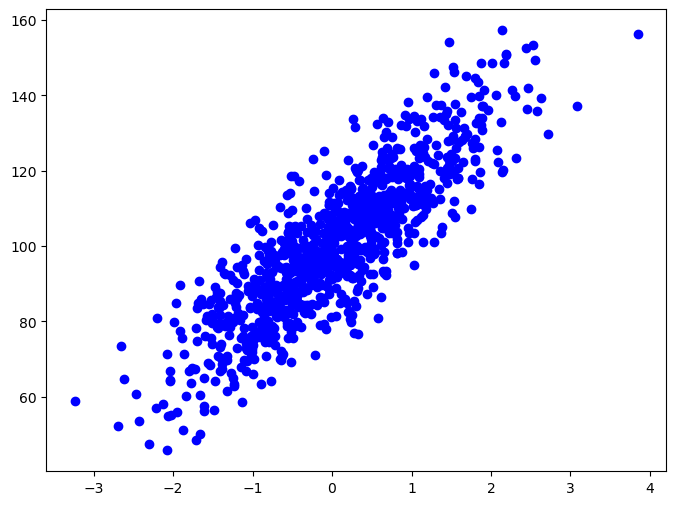

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


n_samples = 1000
n_features = 1
noise = 10.0
bias = 100.0

X, y, coefficients = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=noise,
    coef=True,
    bias=bias,
    random_state=42,
)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="blue", label="Data")

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Linear Regression

In [4]:
# Models
from models.linear_regression import LinearRegression, plot_regression_line
from sklearn.linear_model import LinearRegression as LRScikit

# Metrics
from utils.mse import MSE


linear_regression = LinearRegression()
linear_regression_scikit = LRScikit()

## Train Models

In [5]:
batch_size = 500
epochs = 25
lr = 1e-1

linear_regression.train(X_train, y_train, batch_size, epochs, lr)

In [6]:
linear_regression_scikit.fit(X_train, y_train)

LinearRegression()

## Plot Regression

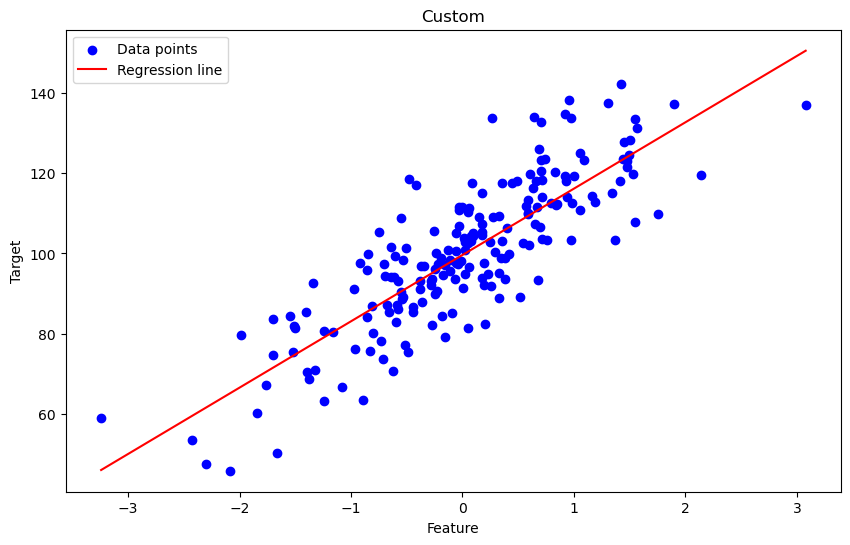

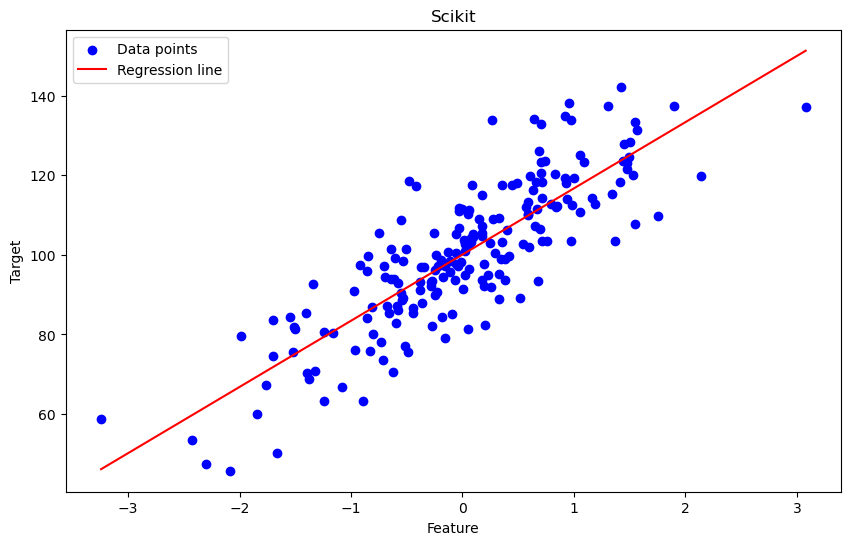

In [7]:
preds_custom = linear_regression.predict(X_test)
preds_scikit = linear_regression_scikit.predict(X_test)

plot_regression_line(X_test, y_test, linear_regression, title="Custom")
plot_regression_line(X_test, y_test, linear_regression_scikit, title="Scikit")

## Metrics

In [8]:
print("Scikit MSE: ", MSE(linear_regression_scikit.predict(X_test), y_test))
print("Custom MSE: ", MSE(linear_regression.predict(X_test), y_test))

Scikit MSE:  102.37195638193857
Custom MSE:  102.54275390126924
